# Exploration of Road Accidents and their correlation with Traffic Signs in Berlin in 2020

## Contents
1. Summary
2. Datasets
3. Install Dependencies and Load Data
4. Questions and their analysis
5. Internvention Strategies and Safety measures:

## Summary

This project report aims to delve deeper into the road accidents that occured in and around Berlin in 2020. With this report, we have mainly tried to identify which types of traffic signs are most commonly associated with road accidents, and whether certain signs are overrepresented at accident sites. The findings of this study could be used to inform the development of targeted traffic safety measures aimed at reducing the number of accidents and injuries on Berlin's roads.

Throughout this report, we have tried to answer the the below three questions to get a more actionable insight into our issues:

1. **Which areas in Berlin are prone to road accidents ?**
2. **Which traffic signs occur the most and at which locations ?**
3. **Is there a correlation between particular road sign and accidents?**

### Datasets

We will be considering two datasets for this analysis:

1. Name: Datasource-3502300782194642410: Strassenverkehrsunfälle nach Unfallort in Berlin 2020.
   <br>URL: https://www.statistik-berlin-brandenburg.de/opendata/AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2020_Datensatz.csv<br> Description: This dataset gives us details of the Category of the accidents, the time of the accidents and the latitudes and longitudes of the accident location.

3. Name: Datasource-7259270924735185334: Traffic Signs: Berlin, 2020.
   <br>URL: https://www.mcloud.de/downloads/mcloud/722EDEC3-38BA-4FE2-B087-18C0434CA34E/traffic_sign_analysis.json
   <br>Description: This dataset provides us insights of the type of the road signs and their geographical location in Berlin.


## Install dependencies

In [64]:
%pip install pandas
%pip install plotly
%pip install 'SQLAlchemy==1.4.46'
%pip install nbformat
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Load data

In [2]:
import pandas as pd

# Read the table Loaction_Traffic_Accidents into a Pandas dataframe
df = pd.read_sql_table('Location_Traffic_Accidents', 'sqlite:///my_database.db')

# Read the table Loaction_Traffic_Signs into a Pandas dataframe
df_road_signs = pd.read_sql_table('Location_Traffic_Signs', 'sqlite:///my_database.db')

Before we go deeper into our questions, below are some information that we have derived directly from our datasets during the exploratory data analysis.

On analyzing our 1st dataset (Road Accidents), we can see that:
<br>**Total No. of accidents in Berlin (2020): 11810.**
<br>**Thursday is the most frequent day with 2021 accidents happening alone on that day.**
<br>**Most of the accidents had minor injuries with a total of 10023 accidents.**

From our 2nd dataset(Traffic Signs), we got to know that:
<br>**Total no. of road signs placed in Berlin (2020): 811.**
<br>**Area with most no. of road signs(Latitude, Longitude):  (52.529, 13.402) with 5 signs.**

Also, here we are considering 3 points after decimal for latitude and longitude which means 50-70 metres distance on road.

## Questions and their analysis

## 1. Which areas in Berlin are prone to road accidents ?

To answer our 1st question, we will use our 1st dataset. We use matplotlib library to draw a scatterplot to understand the frequency of accidents and their locations.

The colored bubbles here represent the accidents that occured and the x axis is set to be the Longitude and the y axis to be the Latitude. The map represents the density of accidents at different geographical co-ordinates. The dotted rectangular area points out the geographical area with maximum density of accidents.

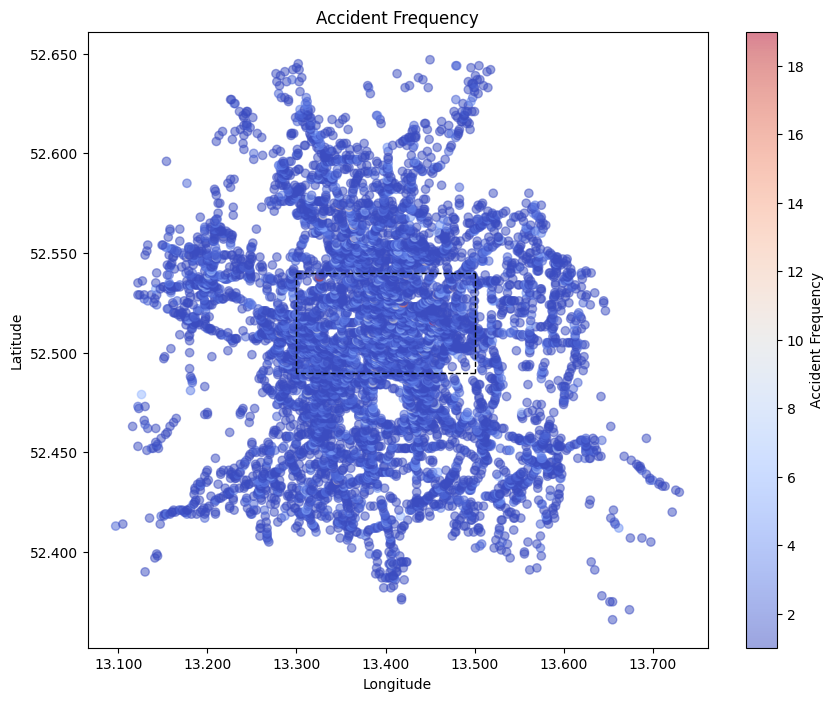

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Group the accidents by latitude and longitude and calculate the accident frequency
grouped = df.groupby(['Latitude', 'Longitude']).size().reset_index(name='Accident_Frequency')

# Create a scatter plot of accident frequency with multicolors
plt.figure(figsize=(10, 8))
plt.scatter(grouped['Longitude'], grouped['Latitude'], alpha=0.5, c=grouped['Accident_Frequency'], cmap='coolwarm')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Frequency')

# Set the number of decimal places for latitude and longitude
decimal_places = 3
plt.xticks(ticks=plt.xticks()[0], labels=[f'{x:.{decimal_places}f}' for x in plt.xticks()[0]])
plt.yticks(ticks=plt.yticks()[0], labels=[f'{y:.{decimal_places}f}' for y in plt.yticks()[0]])

# Add a colorbar to show the accident frequency range
cbar = plt.colorbar()
cbar.set_label('Accident Frequency')

# Define the coordinates of the square corners
corner_1 = (52.540, 13.300)
corner_2 = (52.540, 13.500)
corner_3 = (52.490, 13.300)
corner_4 = (52.490, 13.500)

# Plot the dotted lines forming the square
plt.plot([corner_1[1], corner_2[1]], [corner_1[0], corner_2[0]], 'k--', linewidth=1)
plt.plot([corner_2[1], corner_4[1]], [corner_2[0], corner_4[0]], 'k--', linewidth=1)
plt.plot([corner_4[1], corner_3[1]], [corner_4[0], corner_3[0]], 'k--', linewidth=1)
plt.plot([corner_3[1], corner_1[1]], [corner_3[0], corner_1[0]], 'k--', linewidth=1)

plt.show()

As we can see from the above analysis, the maximum number of accidents in Berlin in 2020, have occured in the area of **(52.540, 13.300) to (52.490, 13.500).** Also, from our earlier exploratory data analysis, we have found that **the most frequent location (Latitude, Longitude) for accident was (52.516, 13.454) with a total count of 19 accidents in 2020.**

## 2. Which traffic sign occurs the most and at which location ?

We are using our second dataset to answer our 2nd question. 
<br>We will answer our second question in two parts. Firstly, to check which traffic sign occurs the most no. of times in the dataset, we will plot a horizontal bar chart which shows the occurence of different road sign types.

/tmp/ipykernel_1105/1149817502.py:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



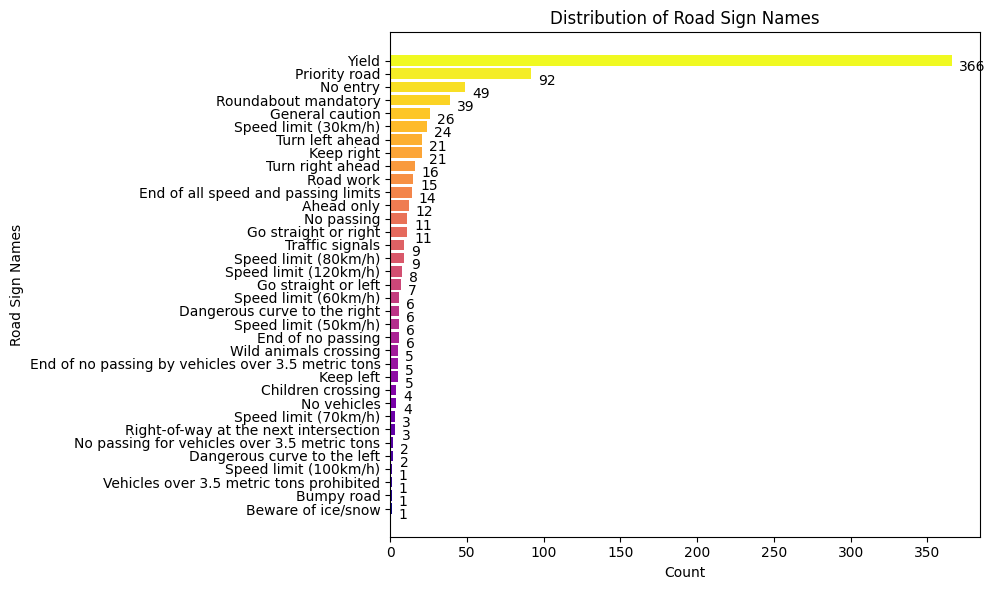

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the road sign names by count in descending order
sorted_counts = df_road_signs['type'].value_counts().sort_values(ascending=True)

# Create a horizontal bar chart with hovering functionality
fig, ax = plt.subplots(figsize=(10, 6))

# Define the colormap
cmap = plt.cm.get_cmap('plasma')
colors = np.linspace(0, 1, len(sorted_counts))

# Create the horizontal bar plot with gradient colors
barh_plot = ax.barh(sorted_counts.index, sorted_counts.values, color=cmap(colors))

# Add values as annotations on the bars
for rect in barh_plot:
    width = rect.get_width()
    ax.annotate(f'{width}', xy=(width, rect.get_y() + rect.get_height() / 2),
                xytext=(5, -5), textcoords='offset points', ha='left', va='center')

# Customize the appearance of the chart
ax.set_xlabel('Count')
ax.set_ylabel('Road Sign Names')
ax.set_title('Distribution of Road Sign Names')
plt.tight_layout()

plt.show()

From the above analysis, we can notice that **"Yield" is the most repeated Road Sign in Berlin in 2020, with a total of 366 times. Whereas, "Beware of ice/snow" and "Bumpy road" and the 2 signs that occur the least number of times, 1 time each.**

Coming to the second part of our question, we will now see which geographical location has "Yeild" maximum number of times.

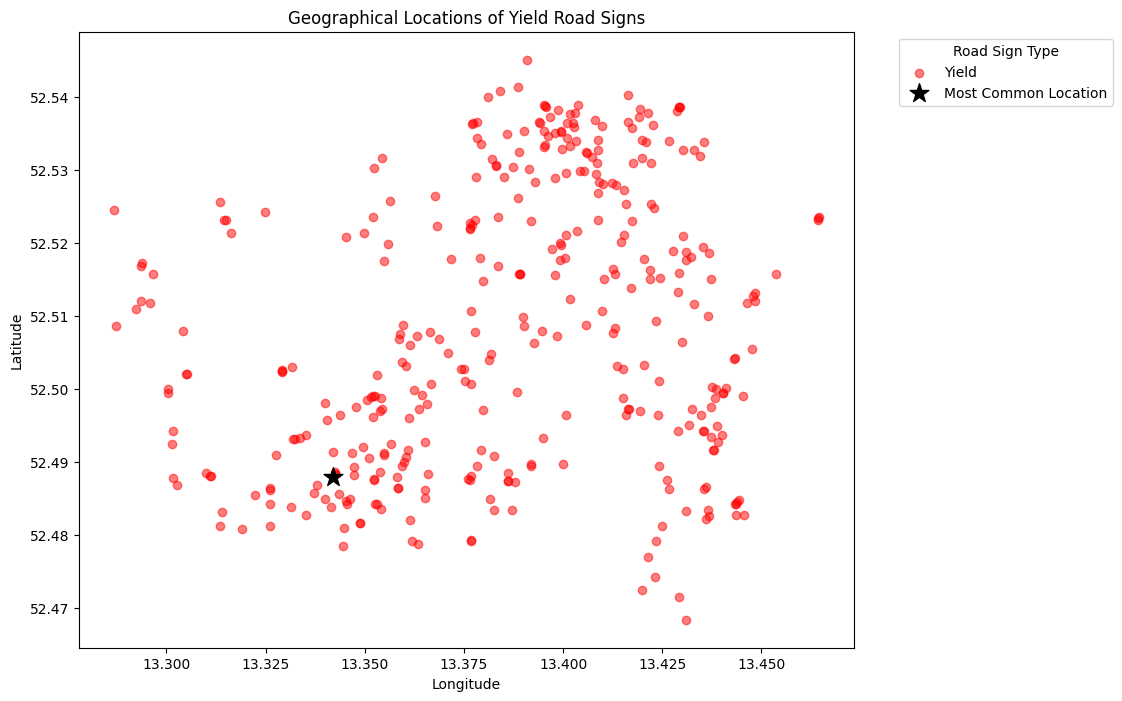

Location with the most number of Yield road signs: Latitude 52.488, Longitude 13.342


In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Filter road signs by type
df_yield = df_road_signs[df_road_signs['type'] == 'Yield']

# Find the latitude and longitude pairs with the most number of Yield road signs
most_common_location = df_yield.groupby(['latitude', 'longitude']).size().idxmax()
most_common_latitude, most_common_longitude = most_common_location

# Round latitude and longitude values to three decimal points
most_common_latitude = round(most_common_latitude, 3)
most_common_longitude = round(most_common_longitude, 3)

# Get the count of "Yield" road signs at the most common location
yield_count = df_yield.groupby(['latitude', 'longitude']).size().max()

# Create a scatter plot to visualize the geographical locations of road signs
plt.figure(figsize=(10, 8))

# Scatter plot of Yield road signs
plt.scatter(df_yield['longitude'], df_yield['latitude'], alpha=0.5, color='red', label='Yield')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Locations of Yield Road Signs')

# Mark the latitude and longitude with the most number of Yield road signs
plt.scatter(most_common_longitude, most_common_latitude, color='black', marker='*', s=200, label='Most Common Location')

# Position the legend outside the scatter plot
plt.legend(title='Road Sign Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

print("Location with the most number of Yield road signs: Latitude {}, Longitude {}".format(most_common_latitude, most_common_longitude))

As seen from the above scatter plot, "Yield" is spread around the area from (latitude, longitude) **(52.540, 13,300) to (52.530,13.450)** and the maximum number of this road sign is present at **(52.488,13.342)**

## 3. Is there a correlation between particular road signs and accidents?

We will be using both the datasets to answer this question. 

At first, we will explore if there is an overlap between the geographical location of the road accidents and the traffic signs. We will again use matplotlib to draw a scatter plot with all the accidents and the traffic signs as bubbles.

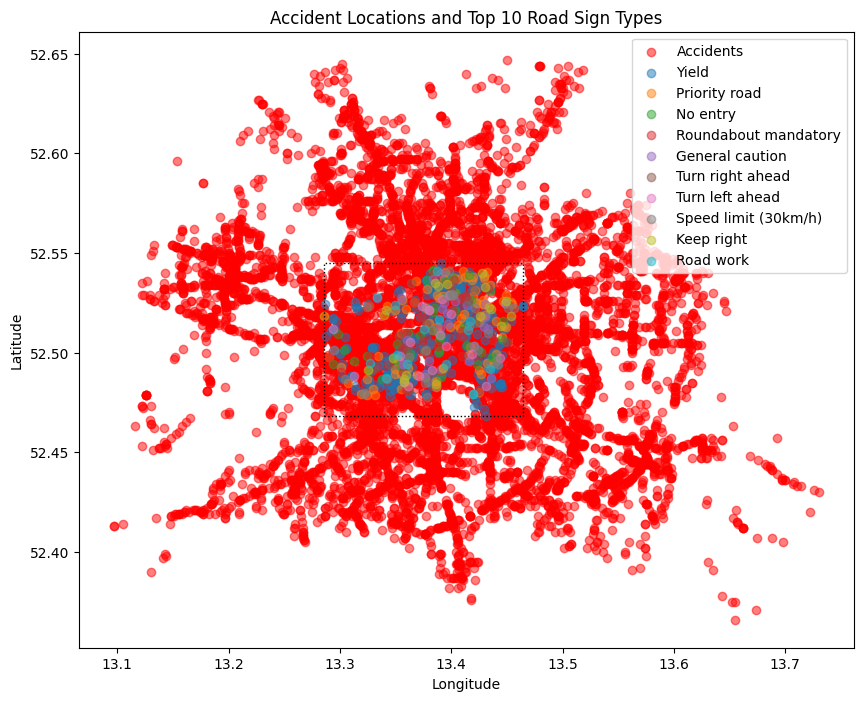

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Preparation
# Assuming you have loaded and formatted the two datasets as dataframes: df and df_road_signs

# Count the frequency of road sign types
road_sign_counts = df_road_signs['type'].value_counts().head(10)

# Filter the road sign dataframe for the top 10 frequent types
top_10_road_signs = df_road_signs[df_road_signs['type'].isin(road_sign_counts.index)]

# Set up the scatter plot
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot of accident locations
ax.scatter(df['Longitude'], df['Latitude'], color='red', alpha=0.5, label='Accidents')

# Scatter plot of road sign locations with different colors for each type
for sign_type, color in zip(top_10_road_signs['type'].unique(), plt.cm.tab10.colors):
    sign_data = top_10_road_signs[top_10_road_signs['type'] == sign_type]
    ax.scatter(sign_data['longitude'], sign_data['latitude'], color=color, alpha=0.5, label=sign_type)

# Calculate the bounding box for the overlapping signs
overlap_min_lon = top_10_road_signs['longitude'].min()
overlap_max_lon = top_10_road_signs['longitude'].max()
overlap_min_lat = top_10_road_signs['latitude'].min()
overlap_max_lat = top_10_road_signs['latitude'].max()

# Draw a dotted hollow rectangle around the overlapping signs
rect = plt.Rectangle((overlap_min_lon, overlap_min_lat), overlap_max_lon - overlap_min_lon,
                     overlap_max_lat - overlap_min_lat, fill=False, linestyle='dotted', edgecolor='black')
ax.add_patch(rect)

# Set plot labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Accident Locations and Top 10 Road Sign Types')

# Show the legend
ax.legend()

# Display the plot
plt.show()

The above scatter plot shows the overlapping geographical area where the road signs and road accidents. The dotted rectangle encompasses the common geographical area between the two datasets.
As we can see, **"Yield" is marked in blue color and appears the most in the overlapping area**. But since, "Yield" is also the road sign that had the highest frequency in Berlin in 2020, we will **consider that as an outlier** in finding the correlation between the two datasets.

Also, we have just kept the top 10 appearing road signs to keep the chart clean.

Now, to explore any kind of correlation between these road signs and the road accidents, we will check the frequency of each road sign against the geographical co-ordinates of the accidents.

For that, we will plot the frequency of the appearance of the road signs on the accident locations in a bar chart. As mentioned above, we are not considering the "Yield" road sign in our correlation exploration, due to it being considered as an outlier.

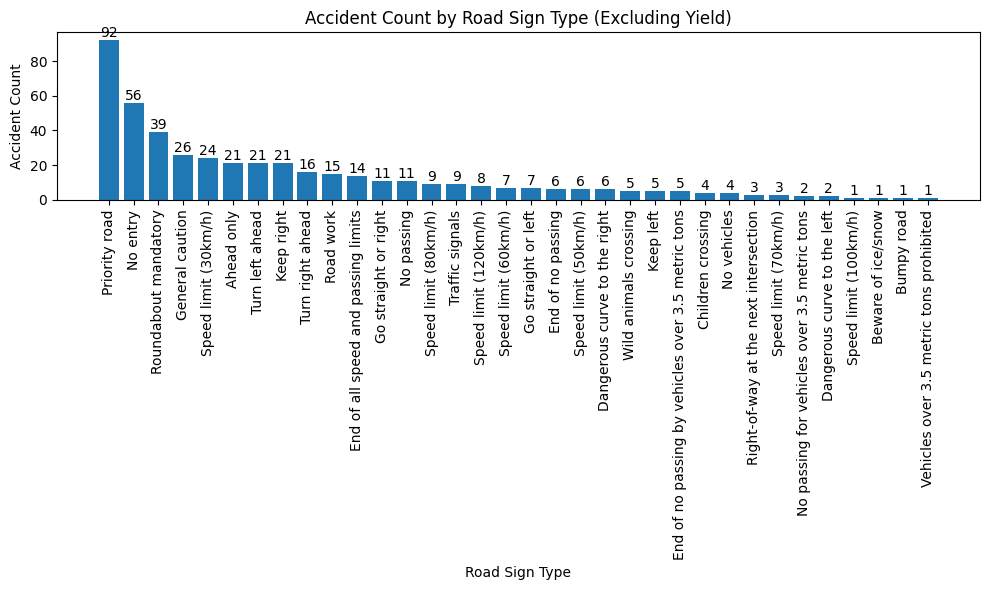

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation
# Assuming you have loaded and formatted the two datasets as dataframes: df and df_road_signs

# Round latitude and longitude to 3 decimal places
df['Latitude'] = df['Latitude'].round(3)
df['Longitude'] = df['Longitude'].round(3)

# Merge the two dataframes based on matching latitude and longitude
merged_data = pd.merge(df_road_signs, df, left_on=['latitude', 'longitude'], right_on=['Latitude', 'Longitude'], how='left')

# Group by road sign type and calculate count of accidents
accidents_by_sign = merged_data.groupby('type').size().reset_index(name='Accident Count')

# Remove rows with specific types ('Yield')
types_to_remove = ['Yield']
accidents_by_sign = accidents_by_sign[~accidents_by_sign['type'].isin(types_to_remove)]

# Sort the dataframe by accident count in descending order
accidents_by_sign = accidents_by_sign.sort_values(by='Accident Count', ascending=False)

# Data Visualization - Bar Chart
plt.figure(figsize=(10, 6))
bars = plt.bar(accidents_by_sign['type'], accidents_by_sign['Accident Count'])
plt.xlabel('Road Sign Type')
plt.ylabel('Accident Count')
plt.title('Accident Count by Road Sign Type (Excluding Yield)')
plt.xticks(rotation=90)
plt.tight_layout()

# Add the numbers on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()

As we can see from the above bar chart, **"Priority road" was found the most (92 times)** near the accident locations, followed by **"No entry" sign (56 times)**. So, to answer our questions, these are the two most common road signs related to accidents. <br><br>And the least road sign to appear near the accident locations are "Speed Limit", "Beware of ice/snow", "Bumpy road" and "Vehicles over 3.5metric tons prohibited".

## Internvention Strategies and Safety measures:

Now coming to the last part of our report, considering our above analysis, below are some safety measures aimed at reducing the number of accidents and injuries on Berlin's roads:

**1. Enhanced Road Sign Visibility and Awareness:** Additional sign boards, specifically for "Priority road" and "No entry" signs need to be installed at accident-prone areas, to improve visibility and comprehension for drivers.

**2. Traffic Enforcement and Monitoring:** Traffic enforcement activities, particularly focusing on violations related to "No entry" signs, such as unauthorized entry into one-way streets or prohibited areas, should be increased.

**3. Targeted Traffic Education and Awareness Campaigns:** Specific road safety campaigns that emphasize safe driving practices on Thursdays, should be designed and implemented, highlighting the increased risk of accidents on this particular day.